In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [8]:
figure_num = 20**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
lw = np.array([0, -75])
up = np.array([20, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUOriginalModel(k=10, c=1000, figures=figures, params=control_vars, params_names=param_names)

In [9]:
mcu_model.train(max_iters=10, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

rre_median_embedding_vs_params: 0.009380391100453302


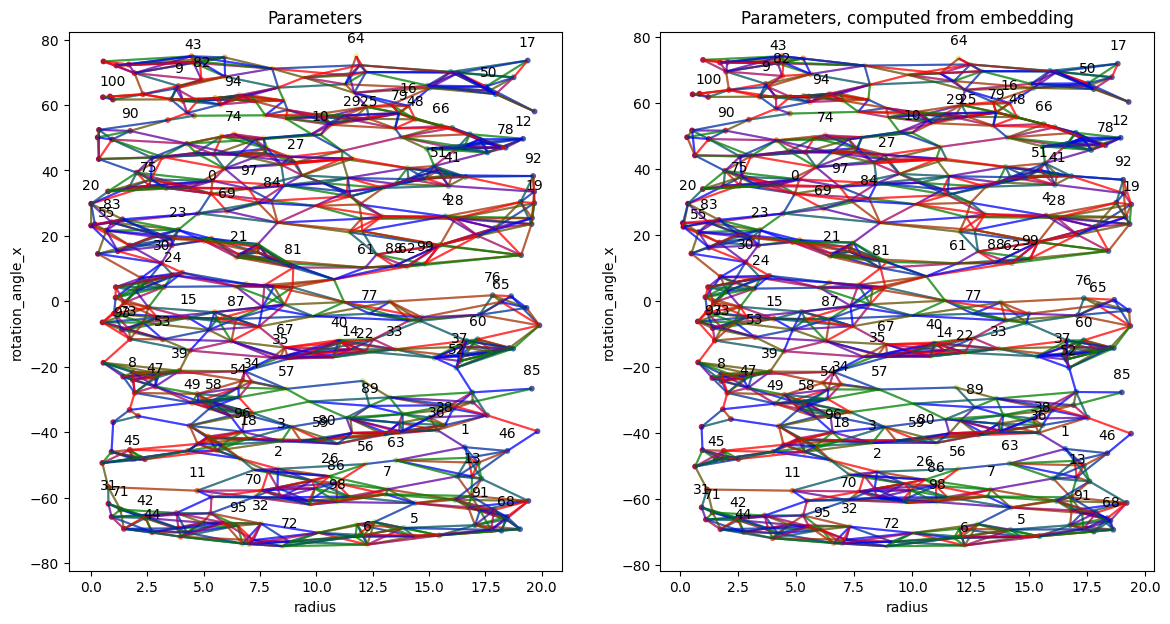

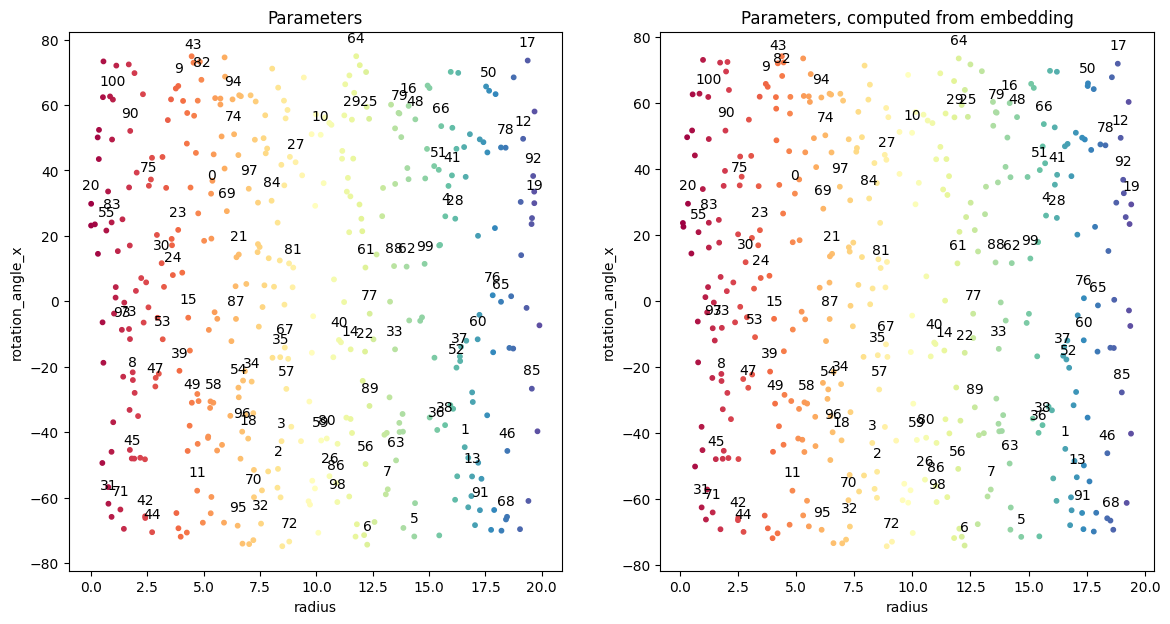

In [10]:

mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [11]:
mcu_experiments = MCUexperiments(mcu_model)
k=10
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, k=k, noise_level=0, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [  2.94572214 -67.77331057], x_err = 105.5782214827669
x_real = [  1.35607315 -73.06128491]
Finding neighbors: 2 ms , optimization: 0 ms
-----------
x_opt  = [  2.94574177 -67.7733474 ], x_err = 105.57834181381925
x_real = [  1.91991837 -73.91034226]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  2.34523186 -65.95024236], x_err = 108.04656455513052
x_real = [  0.97560725 -63.74907467]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  2.60189039 -67.29937555], x_err = 105.35361285310725
x_real = [  1.45565019 -69.4907306 ]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  2.60190184 -67.29951058], x_err = 105.34218813680872
x_real = [  0.94052939 -73.10042169]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [  2.34524084 -65.9502853 ], x_err = 108.04794875609585
x_real = [  1.12584498 -64.40626173]
Finding neighbors: 1 ms , optimization: 0 ms
--

In [12]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, noise_level=0, pieces_cnt=10, test_data_size=20, same_value=False, baseline=True)

-----------
x_opt  = [  2.40342438 -65.72527988], x_err = 127.16829834658495
x_real = [  1.84593903 -65.19361999]
-----------
x_opt  = [  1.46159043 -69.56451849], x_err = 275.1232957658073
x_real = [  1.95549143 -70.48875486]
-----------
x_opt  = [  0.91611008 -65.90315613], x_err = 254.10595391306686
x_real = [  0.08351682 -66.76901107]
-----------
x_opt  = [  1.46159043 -69.56451849], x_err = 209.3214274422677
x_real = [  1.04485393 -71.90296563]
-----------
x_opt  = [  1.46159043 -69.56451849], x_err = 209.3075935599349
x_real = [  0.95835053 -74.94395993]
-----------
x_opt  = [  0.91611008 -65.90315613], x_err = 254.1054002915371
x_real = [ 6.29583963e-02 -6.82752631e+01]
-----------
x_opt  = [  1.30721491 -63.65342451], x_err = 223.0480804667842
x_real = [  1.91993471 -63.10121689]
-----------
x_opt  = [  0.91611008 -65.90315613], x_err = 321.28891058690306
x_real = [  0.67137578 -67.97678645]
-----------
x_opt  = [  0.77629005 -61.88693232], x_err = 340.32357661716014
x_real = [

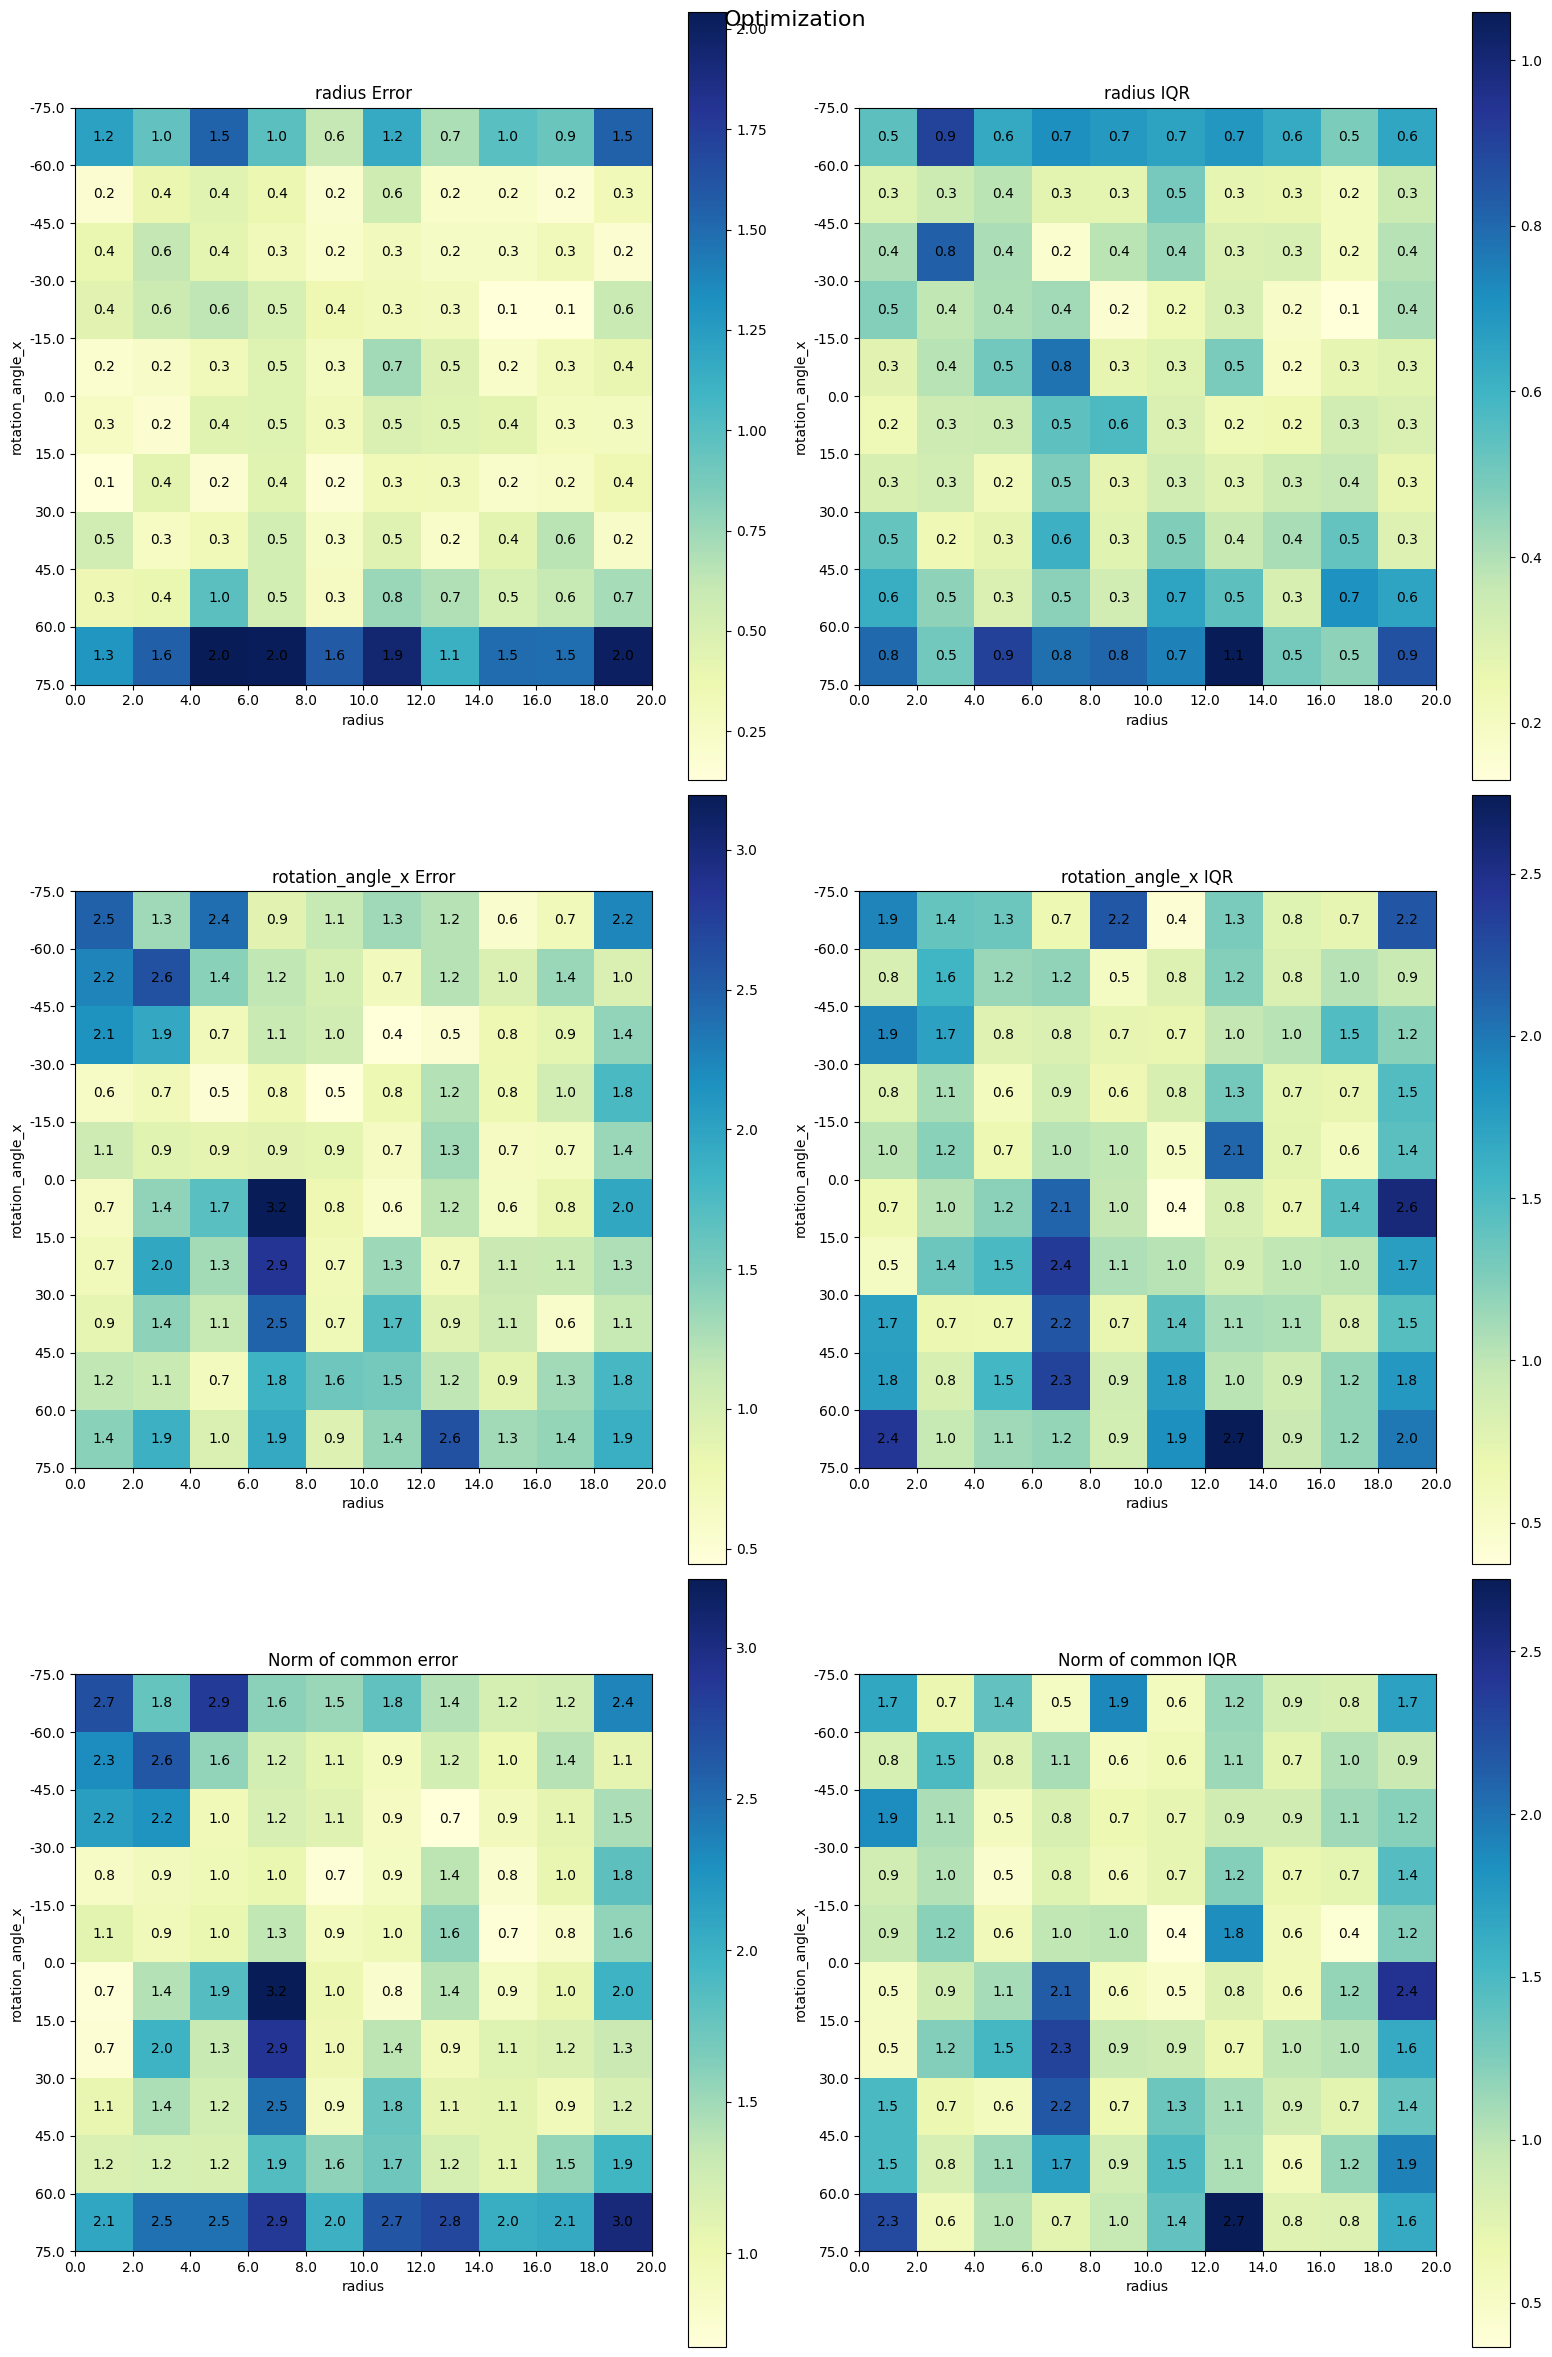

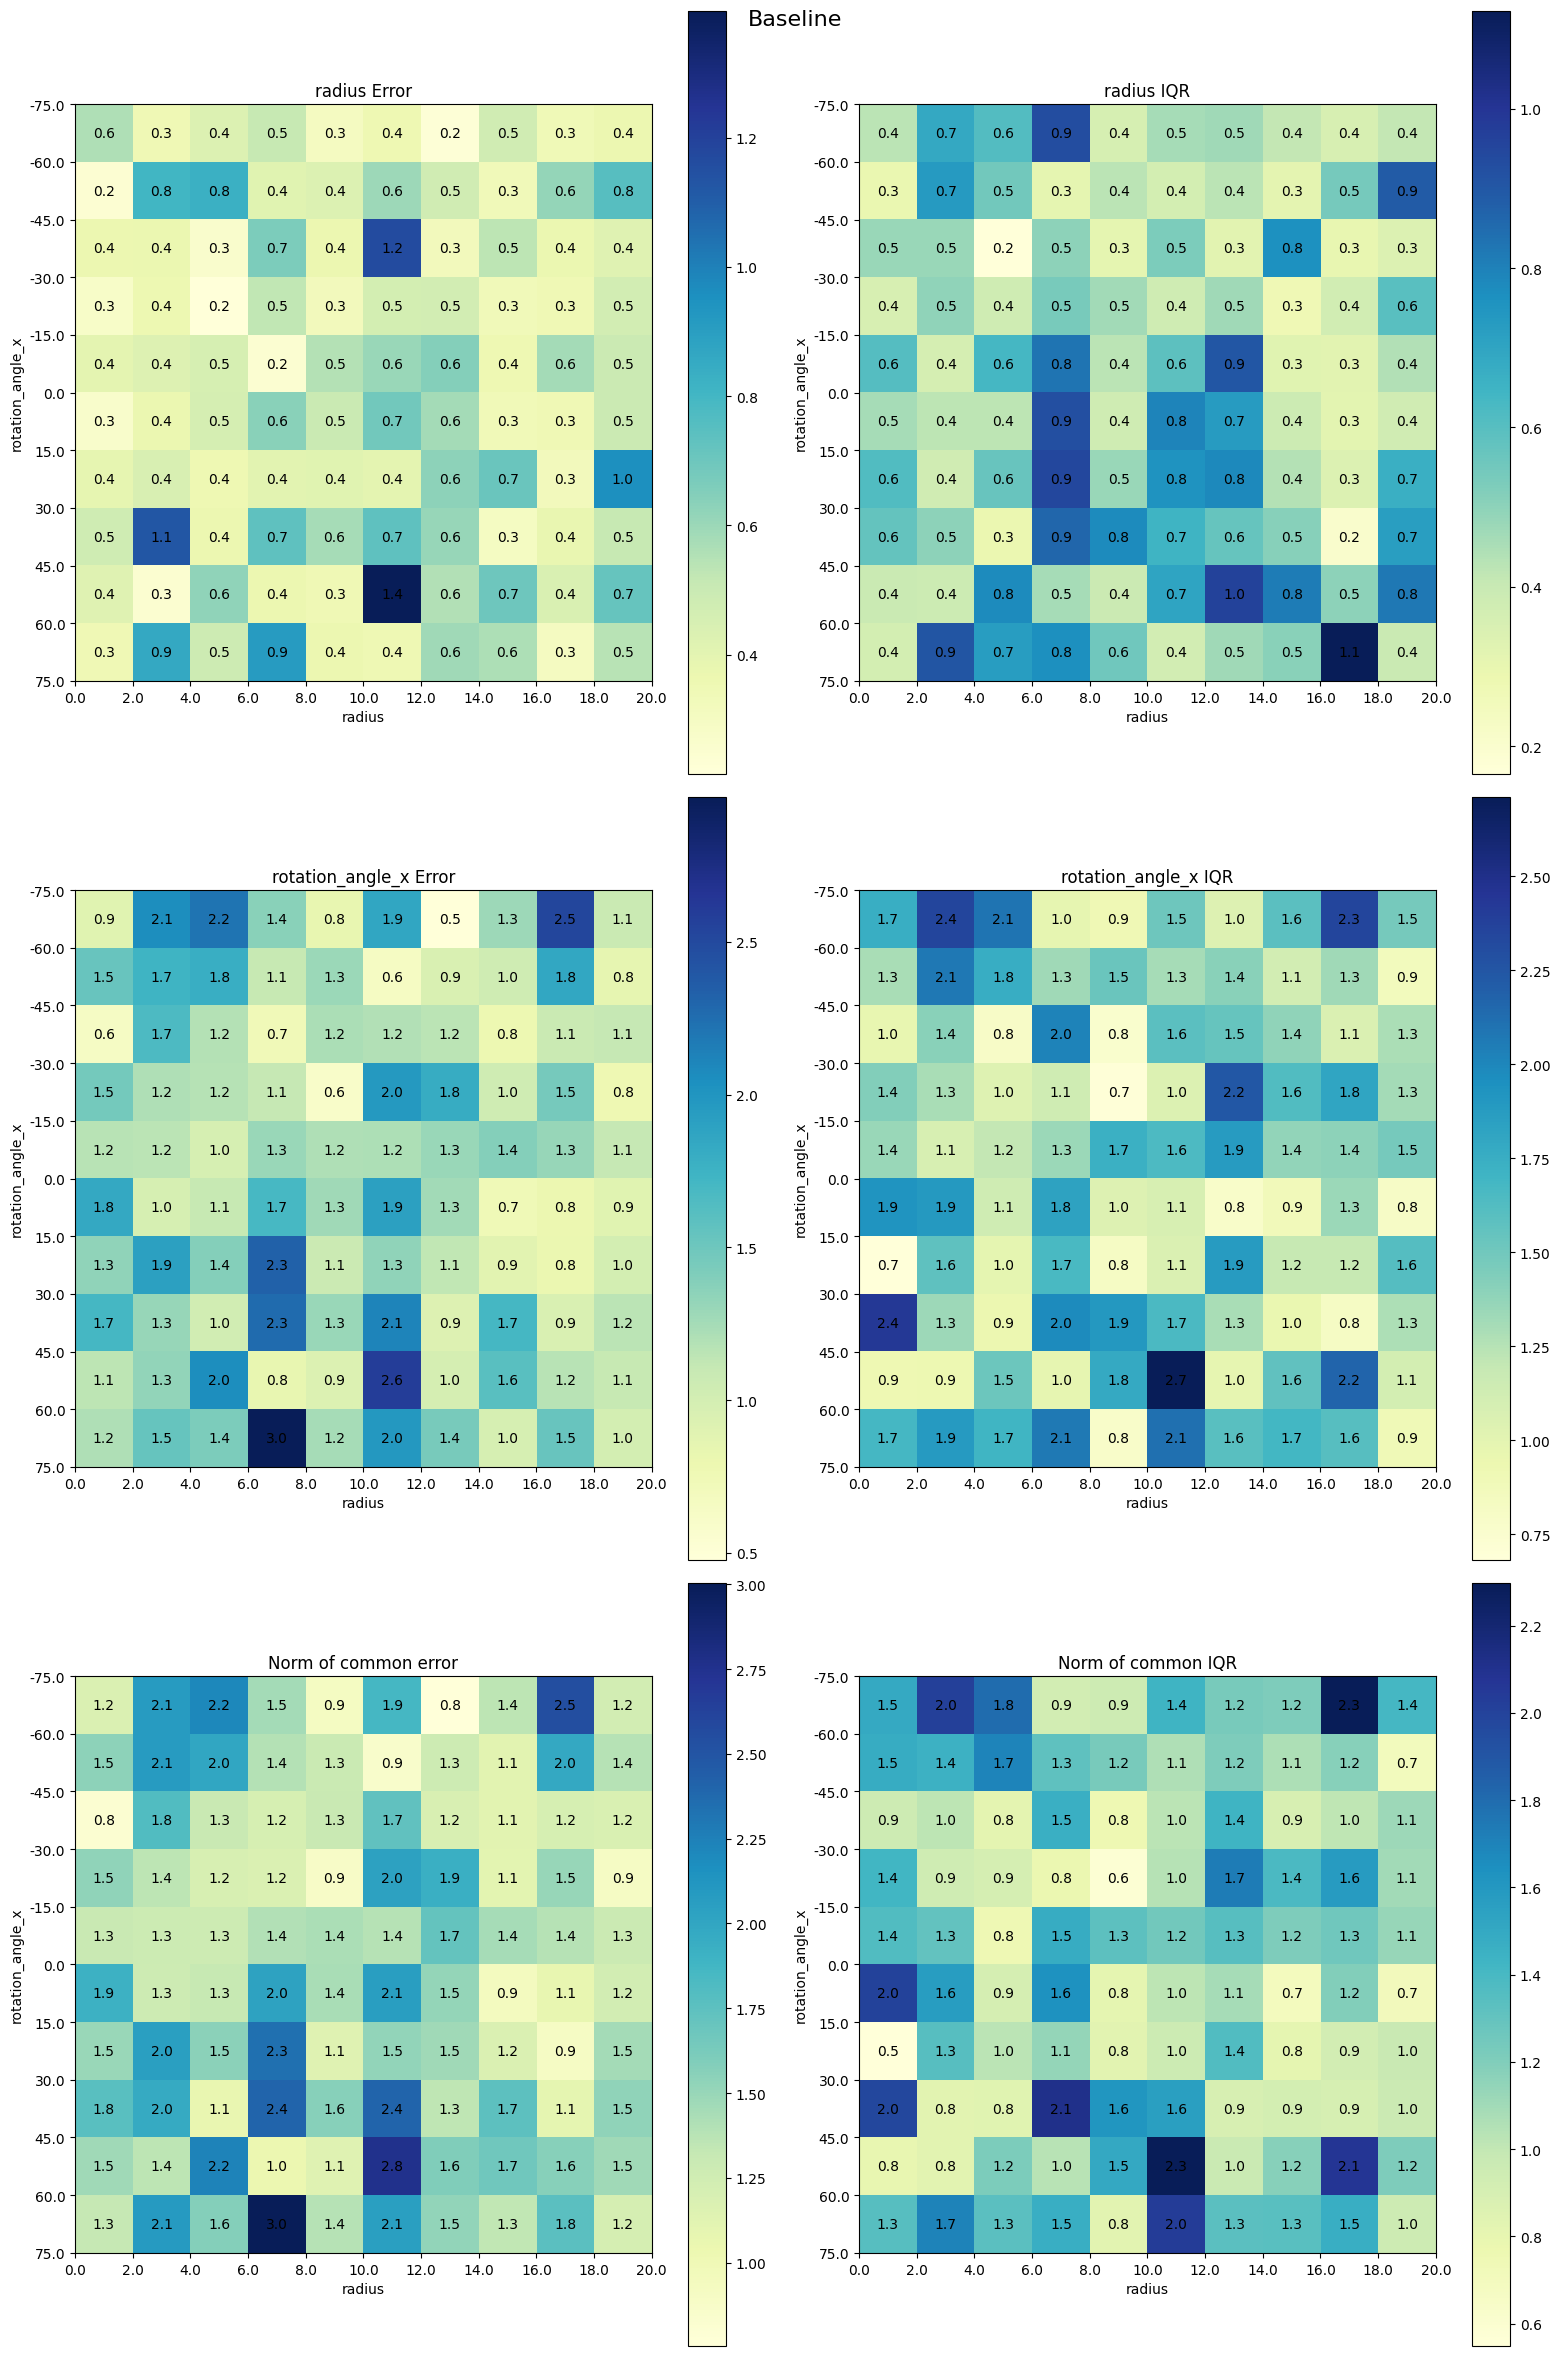

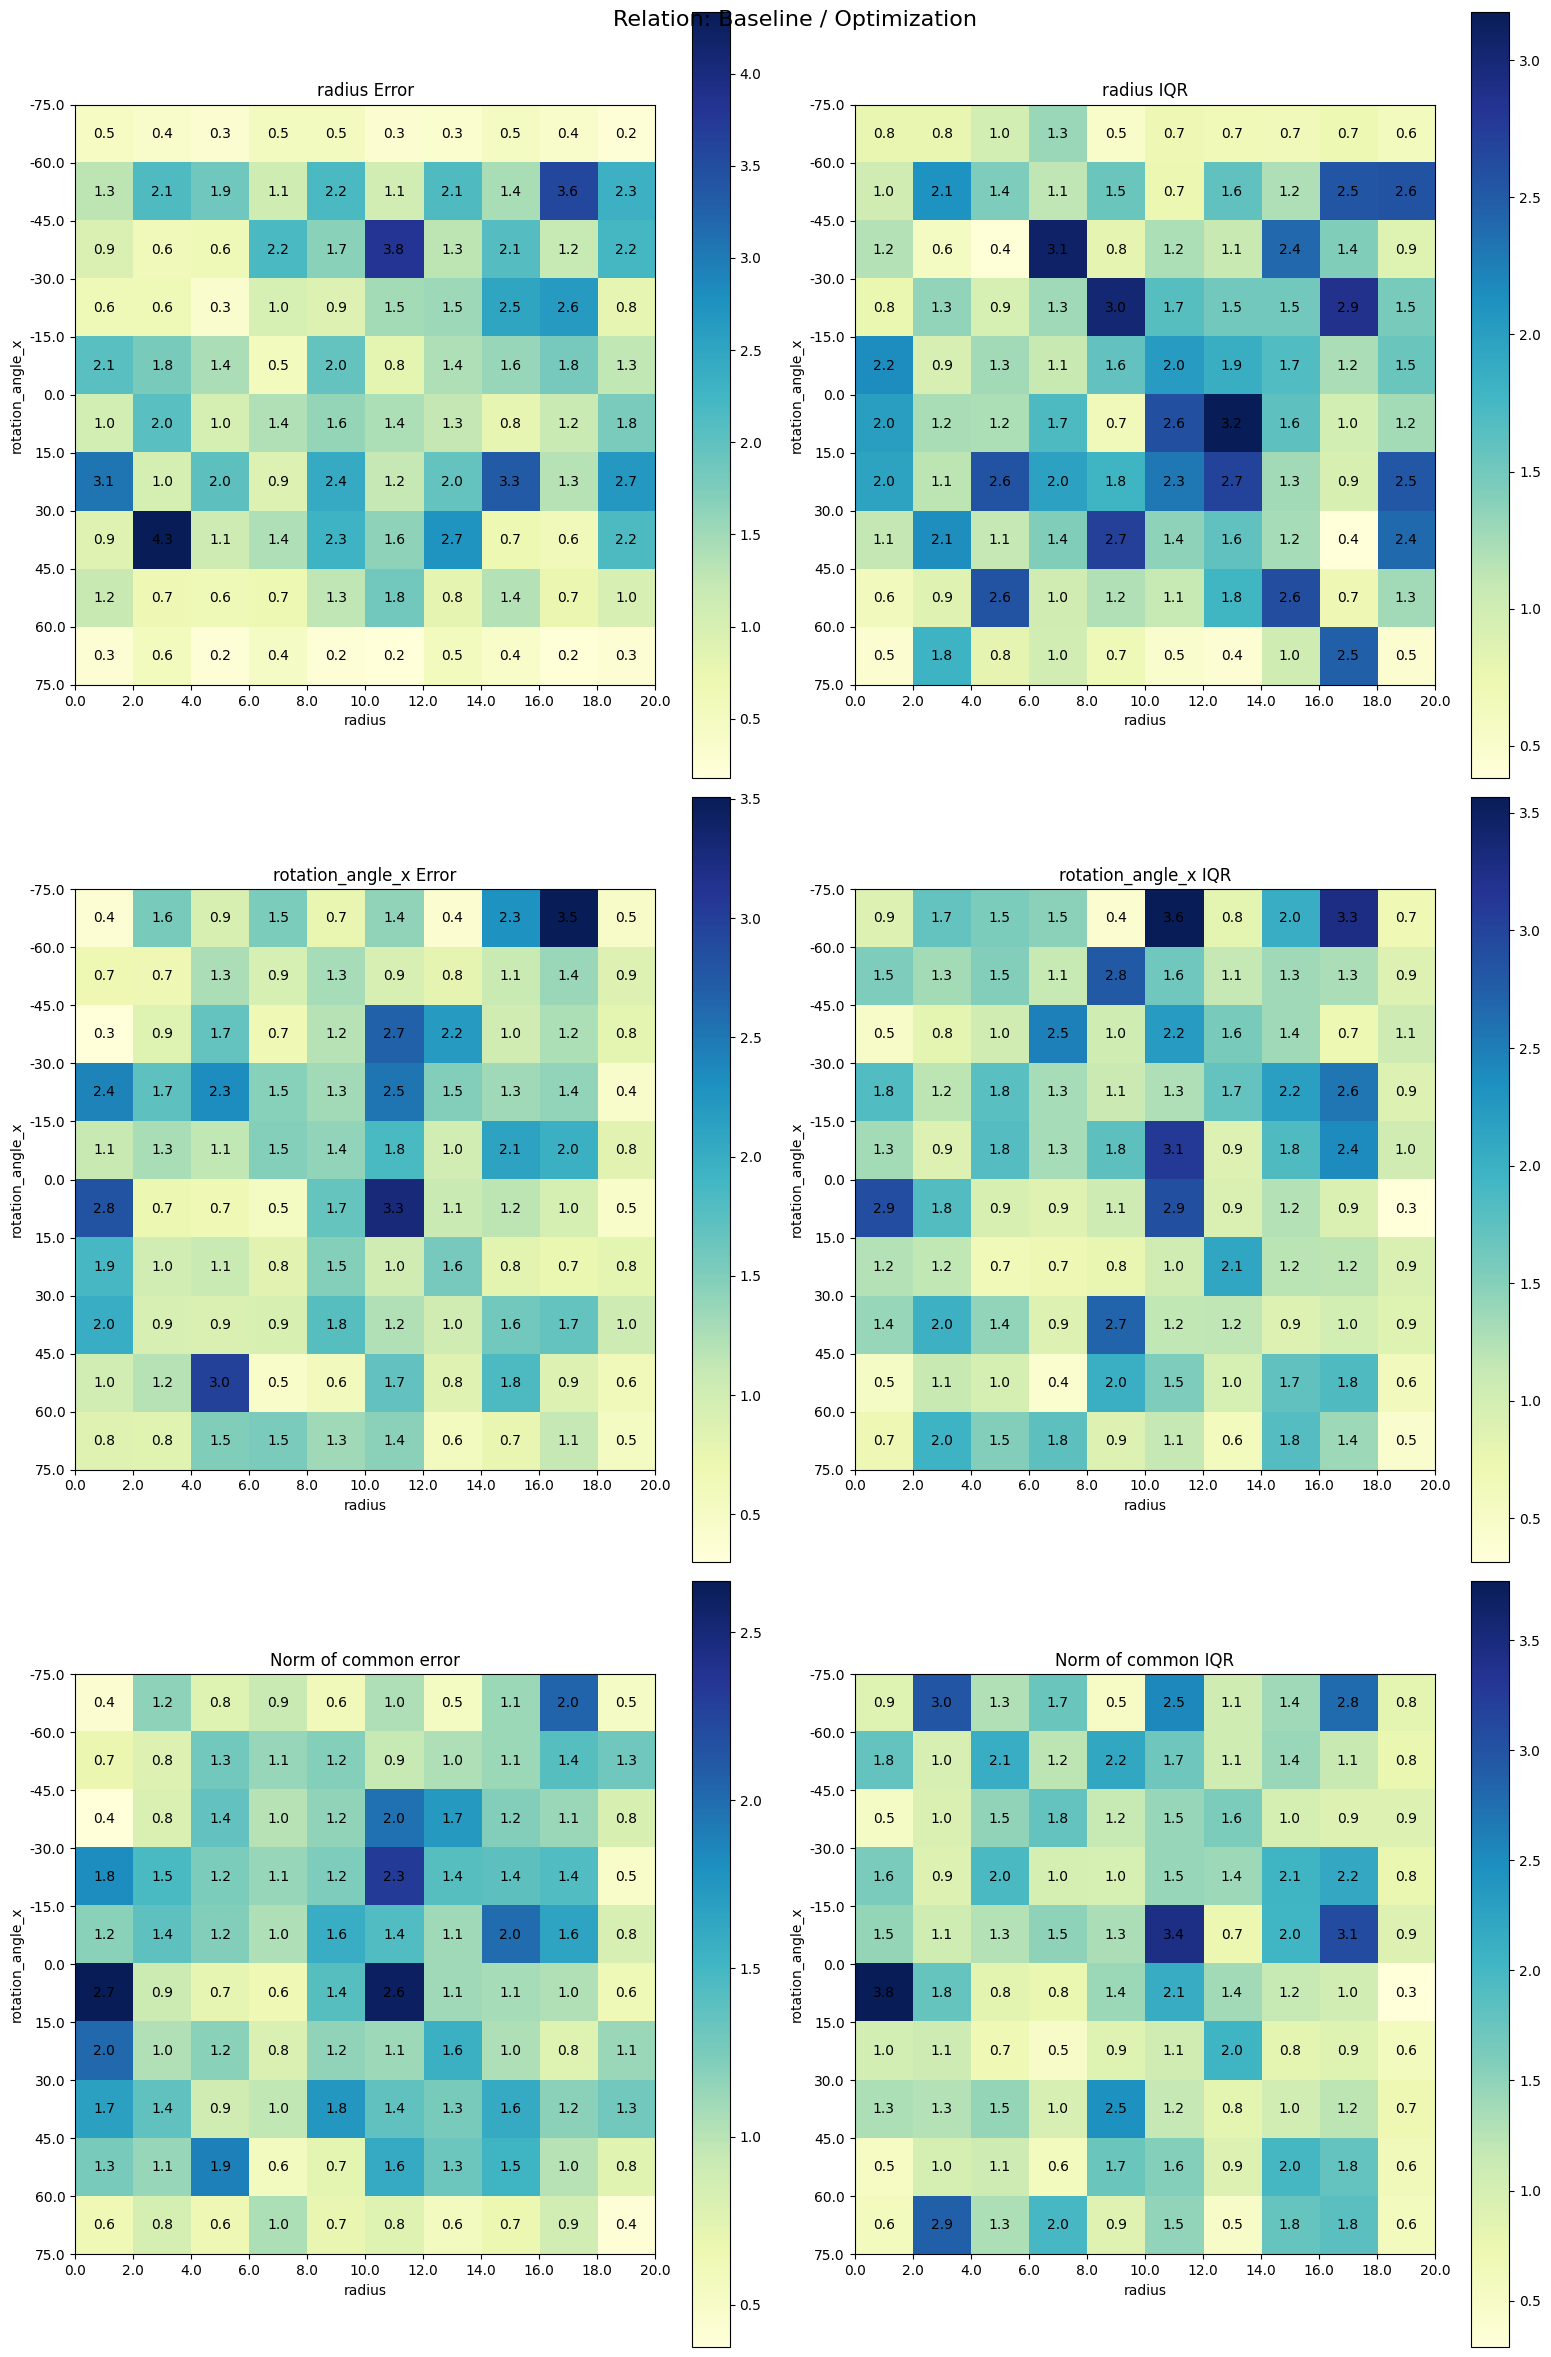

In [14]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_cyl_2d.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_cyl_2d_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_cyl_2d_rel.png", title="Relation: Baseline / Optimization")

-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


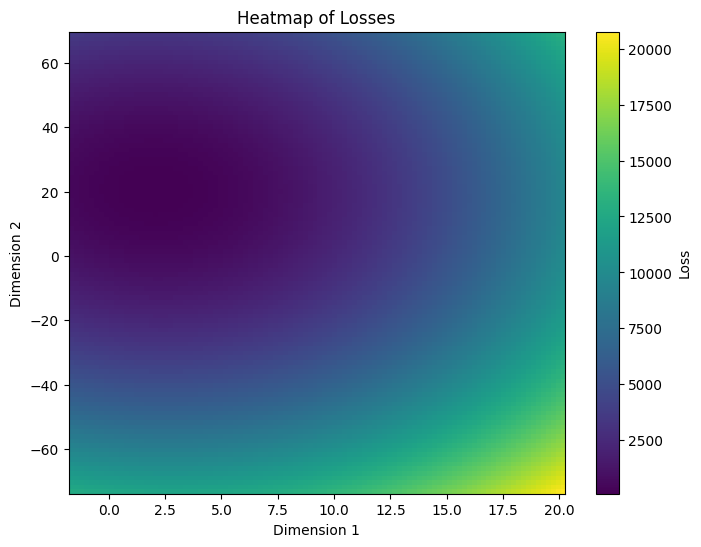

Finding neighbors: 1 ms , optimization: 173 ms
x_opt = [ 1.9318767  20.89038943], x_err = 101.22075338280348
x_real = [ 3 15]
-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


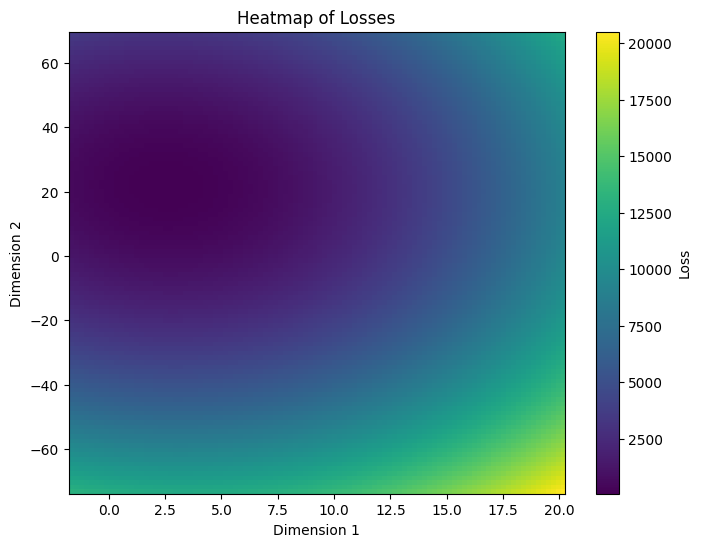

Finding neighbors: 0 ms , optimization: 174 ms
x_opt = [ 2.46635057 22.16683545], x_err = 54.49458604656261
x_real = [ 4 21]
-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


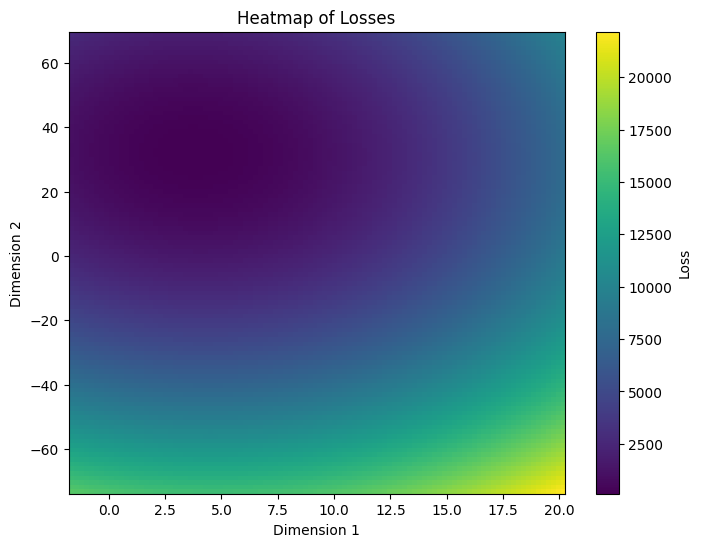

Finding neighbors: 1 ms , optimization: 179 ms
x_opt = [ 3.72739282 32.6648054 ], x_err = 116.05819831418958
x_real = [ 5 30]
-1.7849336917571126 20.231263018004306 -73.88820852024523 69.69560321465968


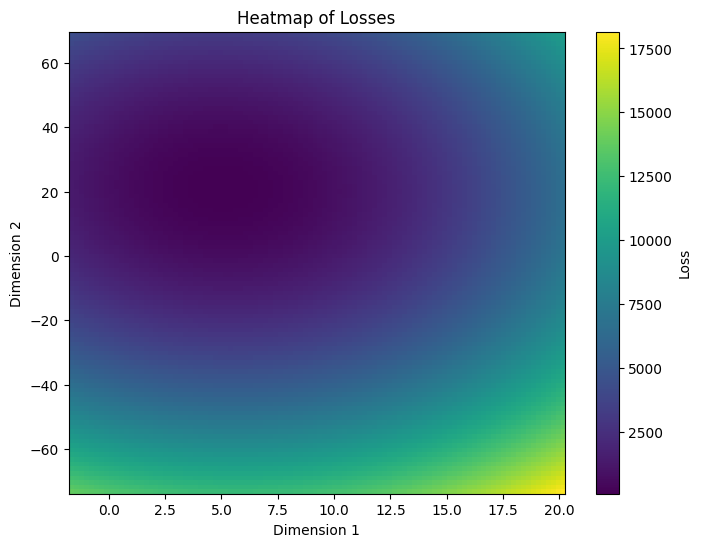

Finding neighbors: 1 ms , optimization: 172 ms
x_opt = [ 4.96883251 21.4987295 ], x_err = 84.00075397857157
x_real = [ 8 20]


In [35]:
test_control_vars = np.array([[3, 15], [4, 21], [5, 30], [8, 20]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, cyl_generator.generate_cylinder_points,
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=5)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")

In [27]:
mcu_model.dists[1, 5]

0.011148275362298427